### CONVERTING DATA INTO CSV FOR BETTER VISUALIZATION 

In [1]:
import numpy as np # for handling mutlidimensional array
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
#loading the dataset into array
count = 0
leaf_blight = []
for x in range(365,704):
    str_x = str(x)
    file_name = "Data/Bacterial leaf blight/DSC_0"+str_x+".JPG"
    try:
        img = load_img(file_name,color_mode="grayscale")
        img = img.resize([28,28])
        img = img_to_array(img)
        img = img/255
        img = np.array(img)
        img = img.ravel()
        count = count+1
        leaf_blight.append(img)
    except:
        continue;
        

In [4]:
print(count)

40


In [5]:
leaf_blight = np.array(leaf_blight)

In [6]:
leaf_blight.shape

(40, 784)

In [7]:
#loading the dataset into array
count = 0
brown_spot = []
for x in range(100,400):
    str_x = str(x)
    file_name = "Data/Brown spot/DSC_0"+str_x+".JPG"
    try:
        img = load_img(file_name,color_mode="grayscale")
        img = img.resize([28,28])
        img = img_to_array(img)
        img = img/255
        img = np.array(img)
        img = img.ravel()
        count = count+1
        brown_spot.append(img)
    except:
        continue;    

In [8]:
count

40

In [9]:
brown_spot = np.array(brown_spot)

In [10]:
brown_spot.shape

(40, 784)

In [11]:
#loading the dataset into array
count = 0
leaf_smut = []
for x in range(290,520):
    str_x = str(x)
    file_name = "Data/Leaf smut/DSC_0"+str_x+".JPG"
    try:
        img = load_img(file_name,color_mode="grayscale")
        img = img.resize([28,28])
        img = img_to_array(img)
        img = img/255
        img = np.array(img)
        img = img.ravel()
        count = count+1
        leaf_smut.append(img)
    except:
        continue;    

In [12]:
count

39

In [13]:
leaf_smut = np.array(leaf_smut)

In [14]:
# stacking all the arrays verticallly to create the dataframe

total = np.vstack((leaf_blight,brown_spot,leaf_smut))

In [15]:
total.shape

(119, 784)

In [16]:
class_labels = ["leaf_blight"]*40 + ["brown_spot"]*40 +["leaf_smut"]*39 

In [17]:
class_labels = np.array(class_labels)

In [18]:
class_labels = class_labels.reshape((119,1))

In [19]:
class_labels.shape

(119, 1)

In [20]:
total_with_classes = np.hstack((total,class_labels))

In [21]:
total_with_classes.shape

(119, 785)

In [22]:
# converting the array into dataframe

df = pd.DataFrame(total_with_classes,columns=["pixel "+ str(x) for x in range(0,784)] + ["Class"])
df.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,Class
0,0.8509804,0.8509804,0.8509804,0.8509804,0.8509804,0.85490197,0.8509804,0.8509804,0.8509804,0.84705883,...,0.84313726,0.84705883,0.84705883,0.8509804,0.8509804,0.8509804,0.8509804,0.8509804,0.85490197,leaf_blight
1,0.8509804,0.8509804,0.84705883,0.84705883,0.84705883,0.84313726,0.8392157,0.84313726,0.84313726,0.84313726,...,0.8509804,0.85490197,0.85490197,0.85882354,0.85882354,0.85882354,0.85882354,0.85882354,0.8627451,leaf_blight
2,0.8784314,0.8745098,0.8745098,0.8745098,0.8745098,0.8745098,0.8784314,0.8784314,0.8784314,0.88235295,...,0.8901961,0.8862745,0.8862745,0.8862745,0.8862745,0.8862745,0.88235295,0.88235295,0.88235295,leaf_blight
3,0.8980392,0.89411765,0.8980392,0.89411765,0.89411765,0.89411765,0.89411765,0.89411765,0.8901961,0.89411765,...,0.87058824,0.8666667,0.87058824,0.8666667,0.8666667,0.8627451,0.85882354,0.85882354,0.85490197,leaf_blight
4,0.9137255,0.9137255,0.91764706,0.91764706,0.91764706,0.91764706,0.92156863,0.92156863,0.92156863,0.92156863,...,0.92156863,0.92156863,0.92156863,0.92156863,0.91764706,0.91764706,0.91764706,0.9137255,0.9137255,leaf_blight


In [23]:
df.Class.value_counts()

leaf_blight    40
brown_spot     40
leaf_smut      39
Name: Class, dtype: int64

In [24]:
# saving the dataframe into csv
df.to_csv("riceleaf.csv")

In [25]:
# PLOTTING AN IMAGE FOR VERIFICATION

img_df = df.iloc[0:1,:-1]

In [26]:
img_df.shape

(1, 784)

In [27]:
img_array = np.array(img_df).reshape((256,256))

ValueError: cannot reshape array of size 784 into shape (256,256)

In [ ]:
plt.imshow(img_array,cmap="gray")

In [ ]:
df = pd.read_csv("riceleaf.csv",index_col = 0)

In [28]:
df.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,Class
0,0.8509804,0.8509804,0.8509804,0.8509804,0.8509804,0.85490197,0.8509804,0.8509804,0.8509804,0.84705883,...,0.84313726,0.84705883,0.84705883,0.8509804,0.8509804,0.8509804,0.8509804,0.8509804,0.85490197,leaf_blight
1,0.8509804,0.8509804,0.84705883,0.84705883,0.84705883,0.84313726,0.8392157,0.84313726,0.84313726,0.84313726,...,0.8509804,0.85490197,0.85490197,0.85882354,0.85882354,0.85882354,0.85882354,0.85882354,0.8627451,leaf_blight
2,0.8784314,0.8745098,0.8745098,0.8745098,0.8745098,0.8745098,0.8784314,0.8784314,0.8784314,0.88235295,...,0.8901961,0.8862745,0.8862745,0.8862745,0.8862745,0.8862745,0.88235295,0.88235295,0.88235295,leaf_blight
3,0.8980392,0.89411765,0.8980392,0.89411765,0.89411765,0.89411765,0.89411765,0.89411765,0.8901961,0.89411765,...,0.87058824,0.8666667,0.87058824,0.8666667,0.8666667,0.8627451,0.85882354,0.85882354,0.85490197,leaf_blight
4,0.9137255,0.9137255,0.91764706,0.91764706,0.91764706,0.91764706,0.92156863,0.92156863,0.92156863,0.92156863,...,0.92156863,0.92156863,0.92156863,0.92156863,0.91764706,0.91764706,0.91764706,0.9137255,0.9137255,leaf_blight


In [29]:
X = df.iloc[:,:-1]

# USING PCA FOR DIMENSIONALITY REDUCTION

In [55]:
pca = PCA(n_components=10)

In [56]:
X_pca = pca.fit_transform(X)

In [57]:
X_pca = pd.DataFrame(X_pca,columns=["1","2","3","4","5","6","7","8","9","10"])

In [58]:
X_pca.head()

,1,2,3,4,5,6,7,8,9,10
0,-0.791794,0.659993,-1.533676,0.403299,0.657479,1.637958,0.432201,-1.170921,-0.989994,0.550816
1,-0.702085,0.621062,-0.433826,0.772997,1.260867,0.902256,1.135343,-0.413992,-0.914286,0.506011
2,-1.167412,0.127483,-0.157800,1.707864,-0.224877,-0.620430,-0.442451,0.537122,0.086817,0.273567
3,0.525174,-1.872003,1.501267,1.294984,1.373490,0.291734,-1.403275,-0.676823,-0.949829,0.399682
4,-0.182799,-1.707022,0.005437,-0.099758,-0.551886,0.137534,-0.378440,-1.057786,0.387789,-1.511576


In [59]:
X_pca["Class"] = df.Class

In [60]:
X_pca.head()

,1,2,3,4,5,6,7,8,9,10,Class
0,-0.791794,0.659993,-1.533676,0.403299,0.657479,1.637958,0.432201,-1.170921,-0.989994,0.550816,leaf_blight
1,-0.702085,0.621062,-0.433826,0.772997,1.260867,0.902256,1.135343,-0.413992,-0.914286,0.506011,leaf_blight
2,-1.167412,0.127483,-0.157800,1.707864,-0.224877,-0.620430,-0.442451,0.537122,0.086817,0.273567,leaf_blight
3,0.525174,-1.872003,1.501267,1.294984,1.373490,0.291734,-1.403275,-0.676823,-0.949829,0.399682,leaf_blight
4,-0.182799,-1.707022,0.005437,-0.099758,-0.551886,0.137534,-0.378440,-1.057786,0.387789,-1.511576,leaf_blight


In [61]:
import seaborn as sns

<AxesSubplot:xlabel='1', ylabel='2'>

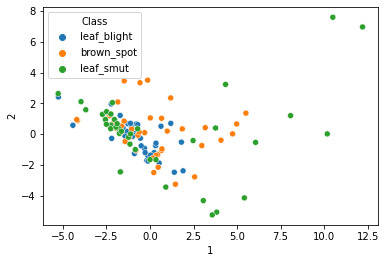

In [62]:
sns.scatterplot(x=X_pca["1"],y=X_pca["2"],hue=df.Class)

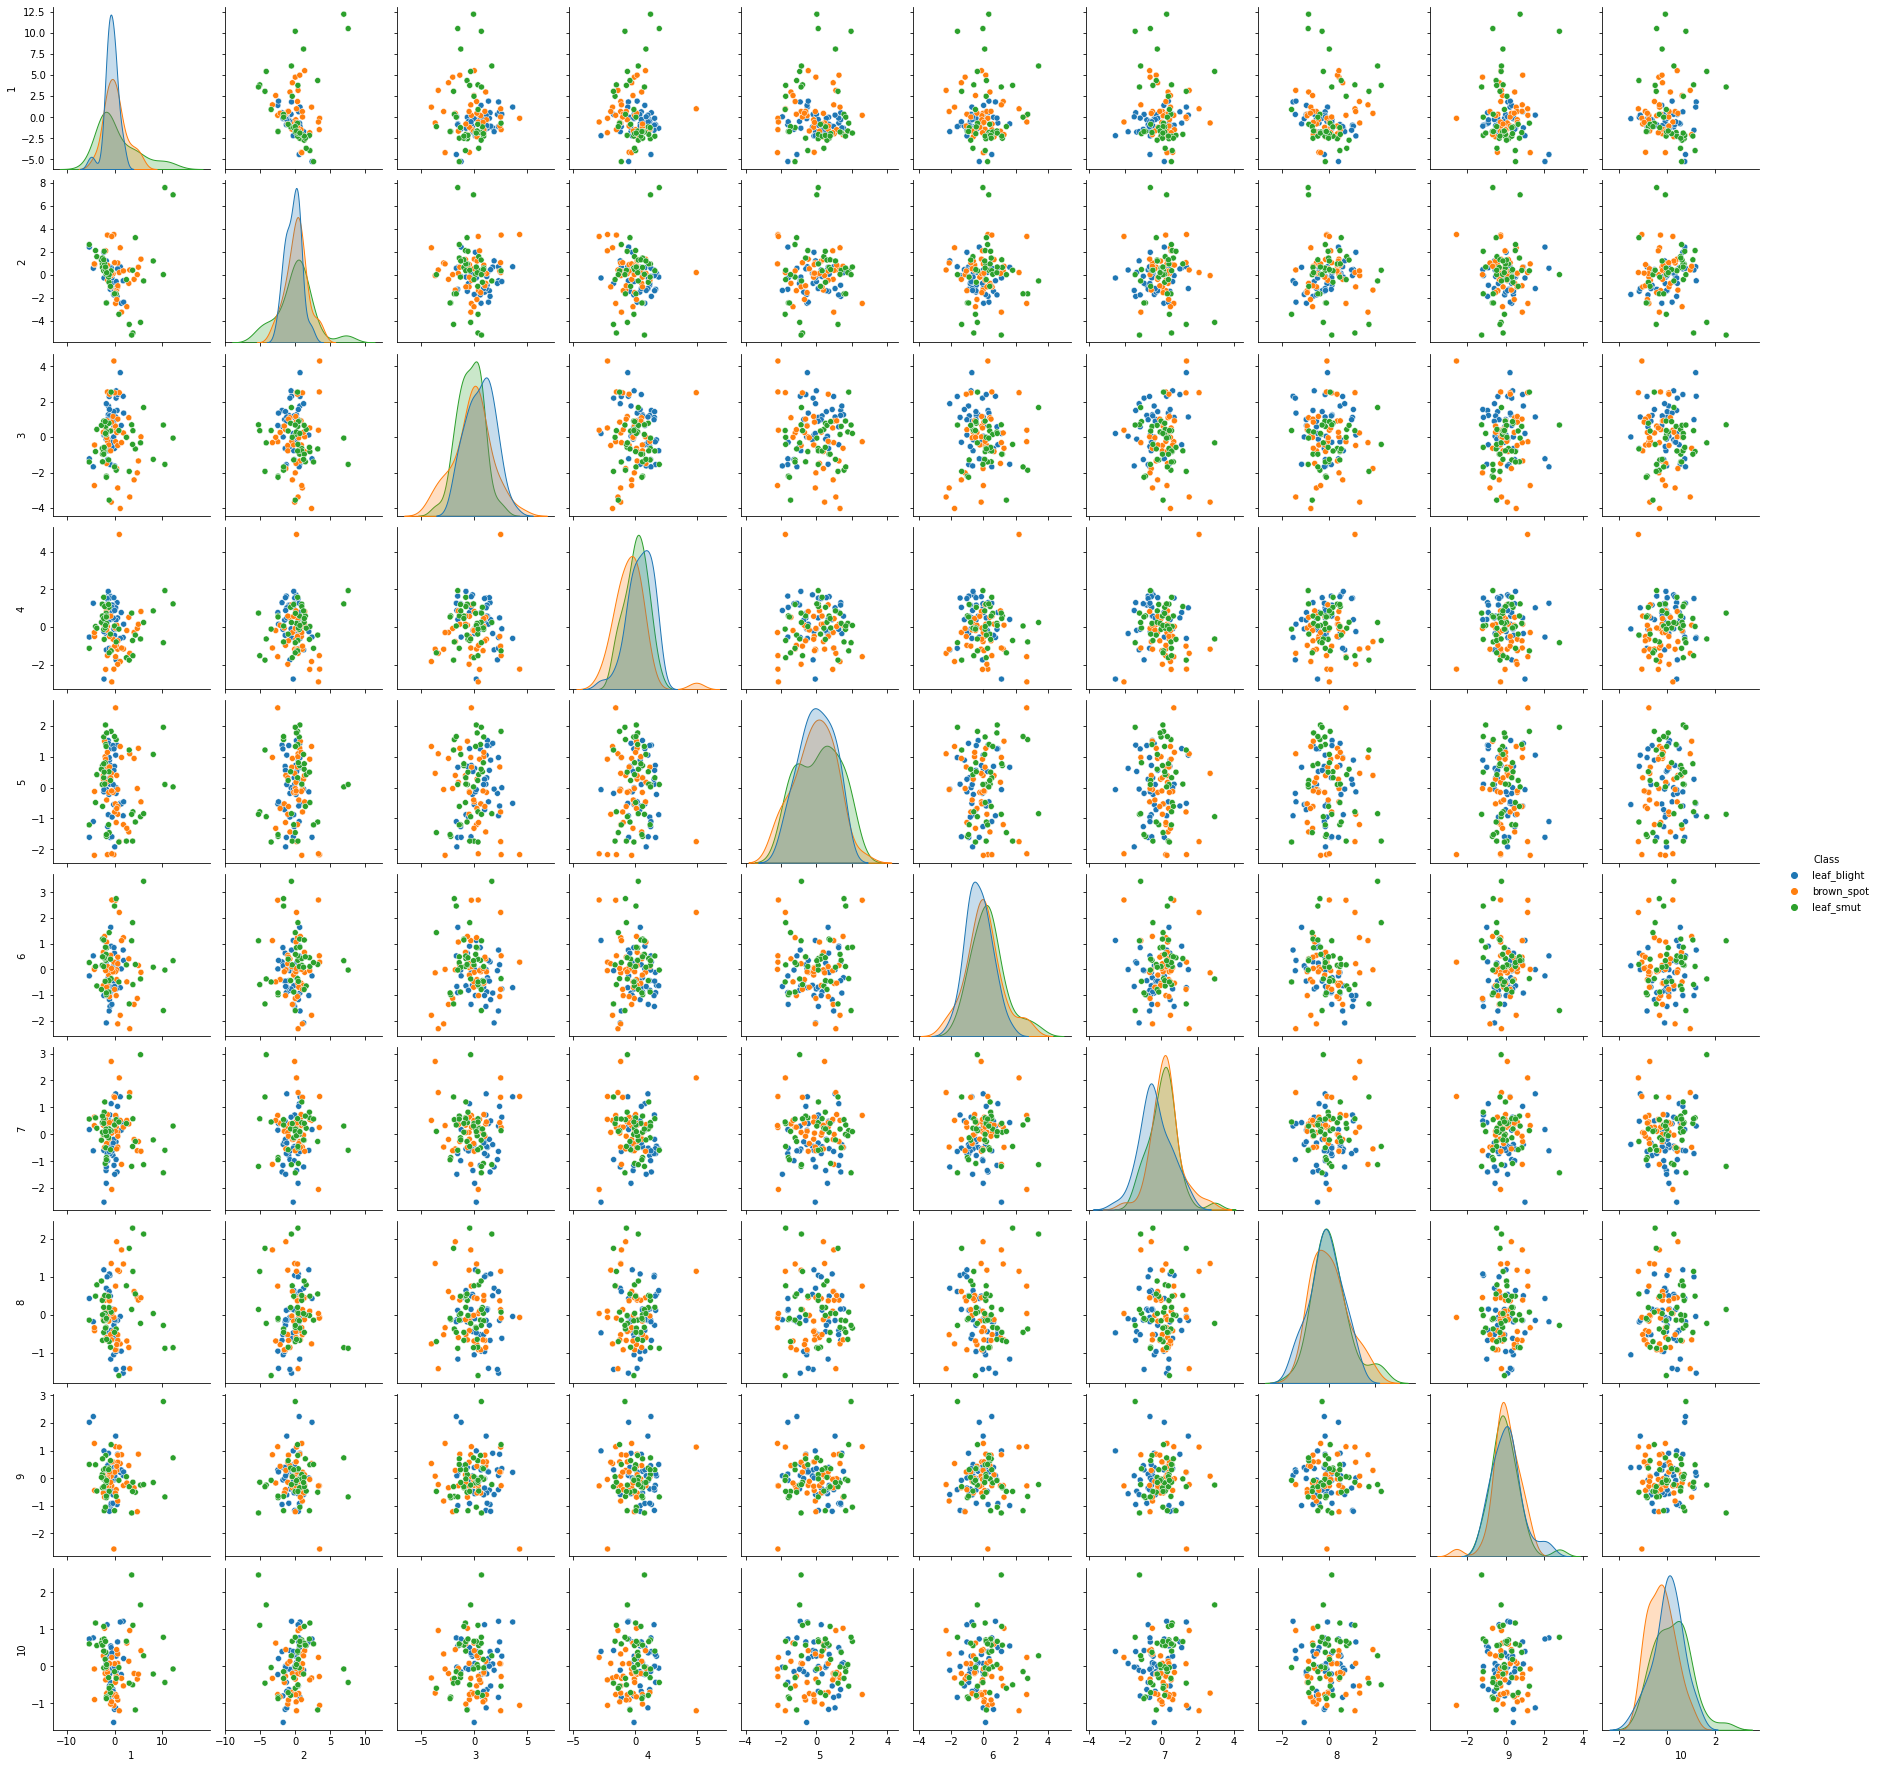

In [65]:
sns.pairplot(X_pca,hue="Class")

# USING TSNE FOR DIMENSIONALITY REDUCTION

In [67]:
tsne = TSNE(n_components=10)

In [68]:
X_tsne = pca.fit_transform(X)

In [69]:
X_tsne = pd.DataFrame(X_tsne,columns=["1","2","3","4","5","6","7","8","9","10"])

In [70]:
X_tsne["Class"] = df.Class

In [71]:
X_tsne.head()

,1,2,3,4,5,6,7,8,9,10,Class
0,-0.791794,0.659993,-1.533676,0.403299,0.657479,1.637958,0.432198,-1.170916,-0.989991,0.550860,leaf_blight
1,-0.702085,0.621062,-0.433826,0.772997,1.260867,0.902256,1.135341,-0.413988,-0.914292,0.506062,leaf_blight
2,-1.167412,0.127483,-0.157800,1.707864,-0.224877,-0.620430,-0.442450,0.537118,0.086810,0.273556,leaf_blight
3,0.525174,-1.872003,1.501267,1.294984,1.373490,0.291734,-1.403277,-0.676822,-0.949828,0.399704,leaf_blight
4,-0.182799,-1.707022,0.005437,-0.099758,-0.551886,0.137534,-0.378438,-1.057791,0.387786,-1.511602,leaf_blight


<AxesSubplot:xlabel='1', ylabel='2'>

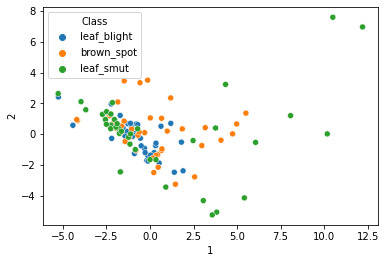

In [73]:
sns.scatterplot(x=X_tsne["1"],y=X_tsne["2"],hue=df.Class)

#### Above plotting shows that leaf smut and leaf blight look similar

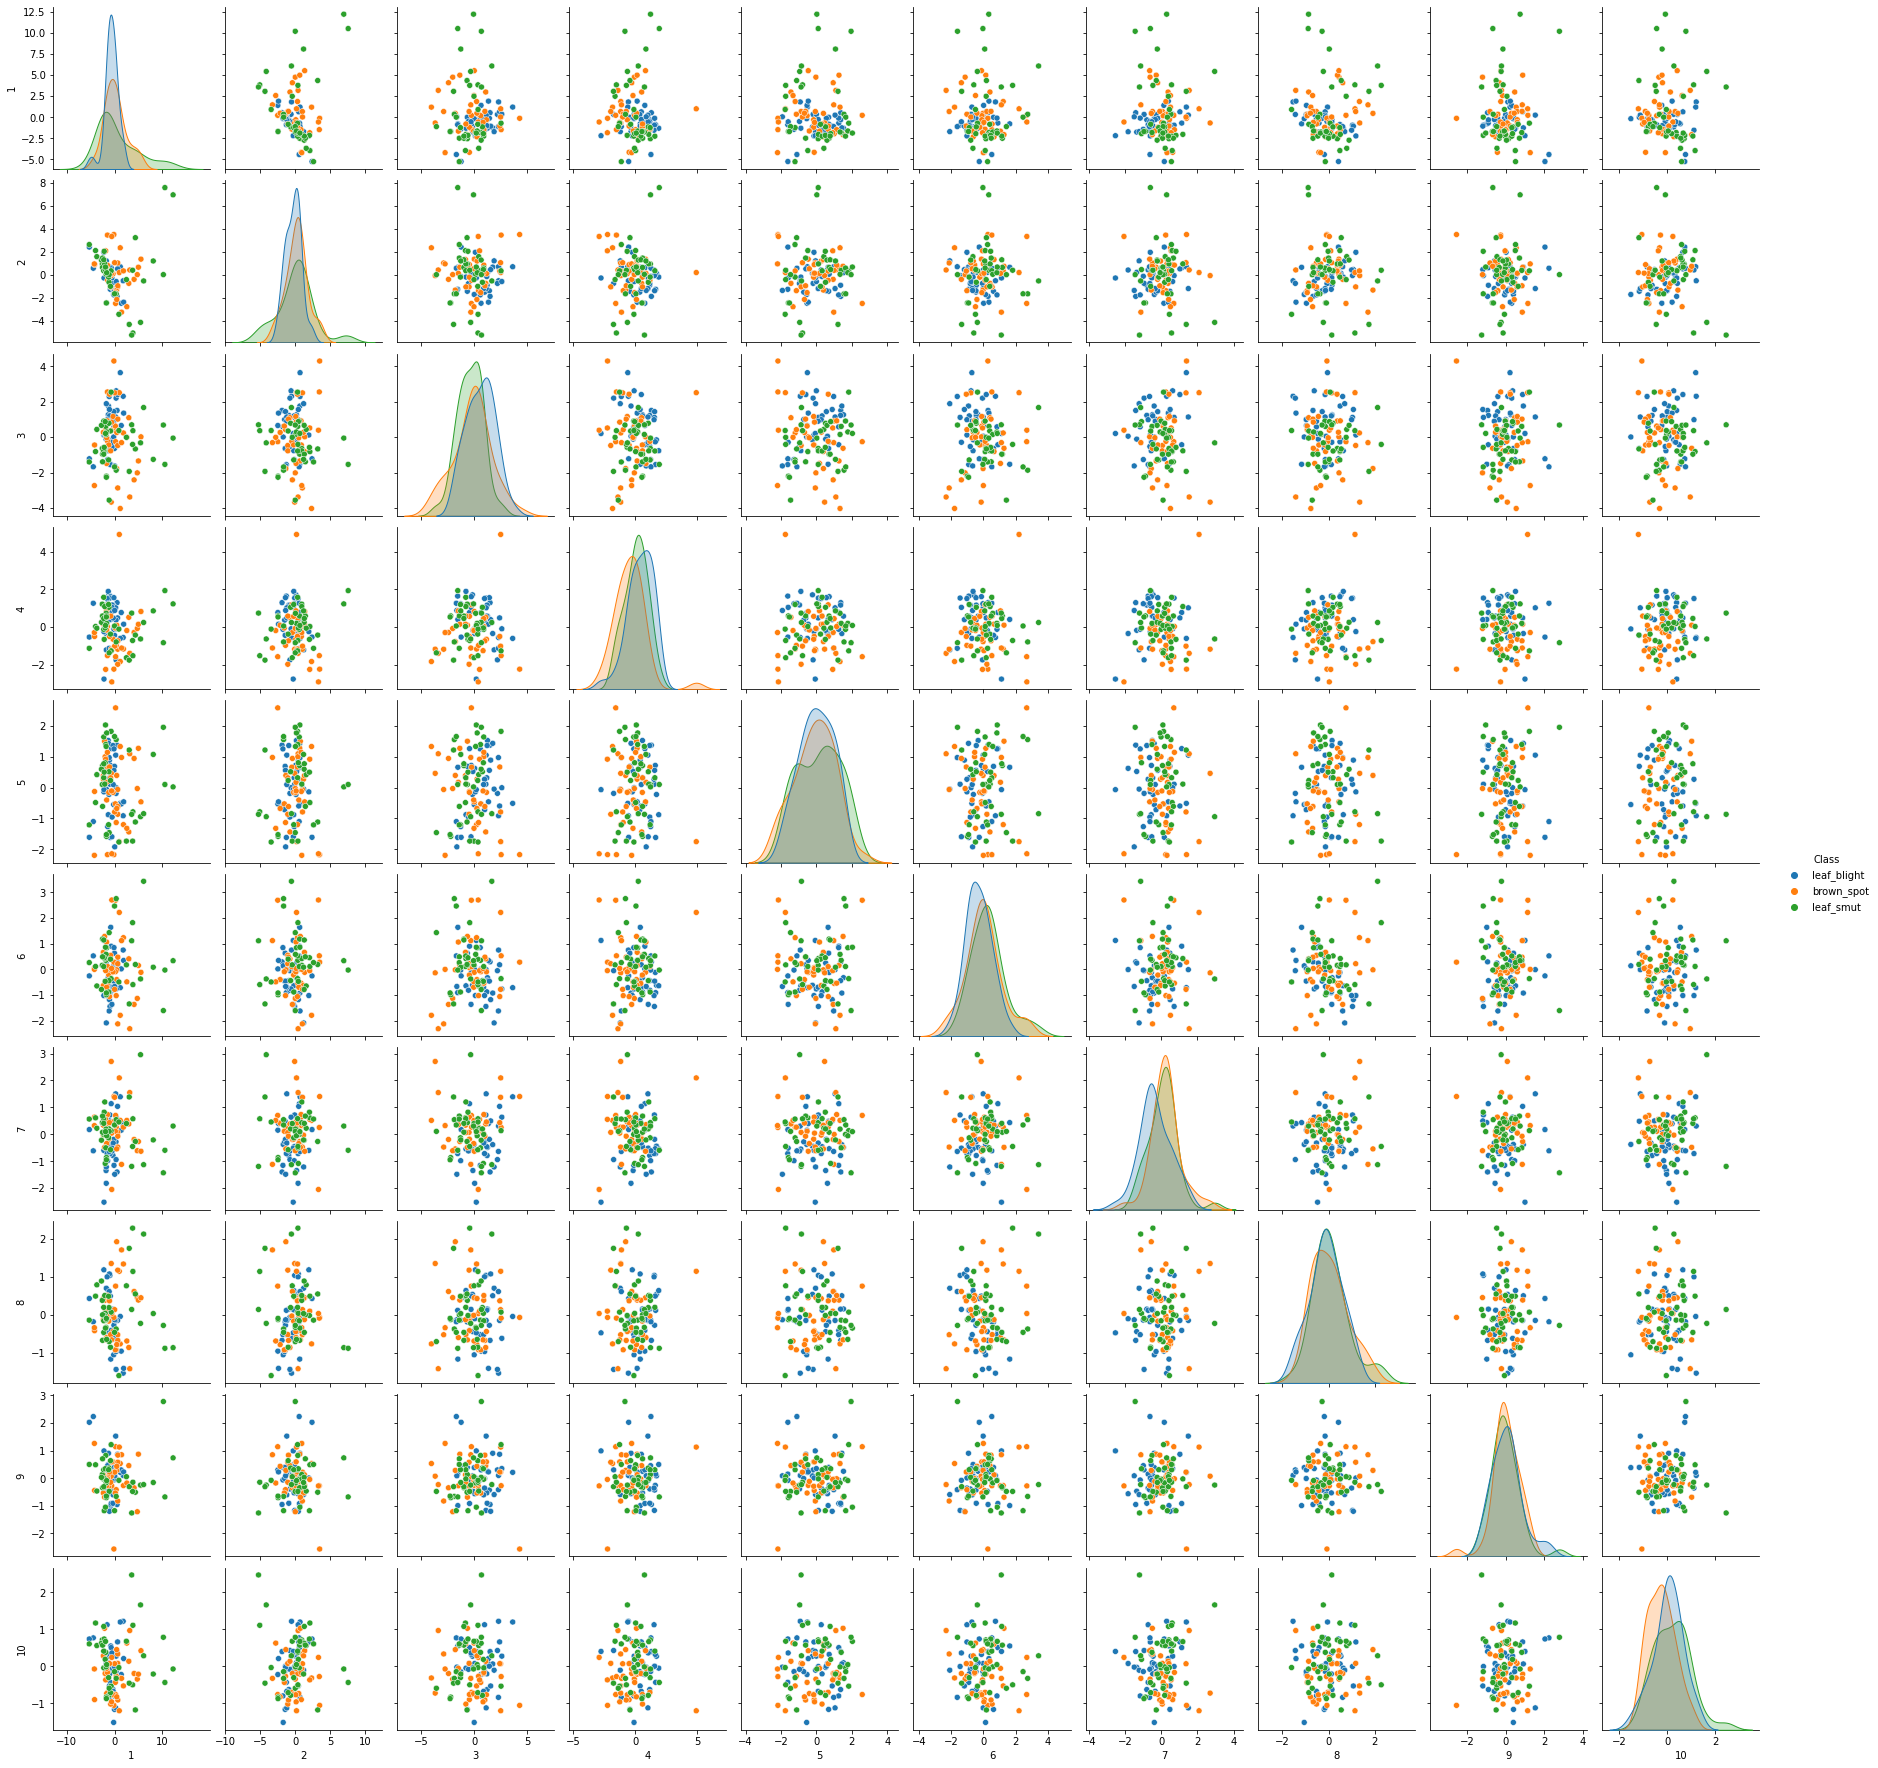

In [74]:
sns.pairplot(X_tsne,hue="Class")

From the above plots we can conclude that the data is not sepearable
So, no ML algoirthm works better for classification

#### CNN IS PREFFERED


# **Even dimensionality reduction is also not helping in classification***